c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\google\auth\_default.py:78: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


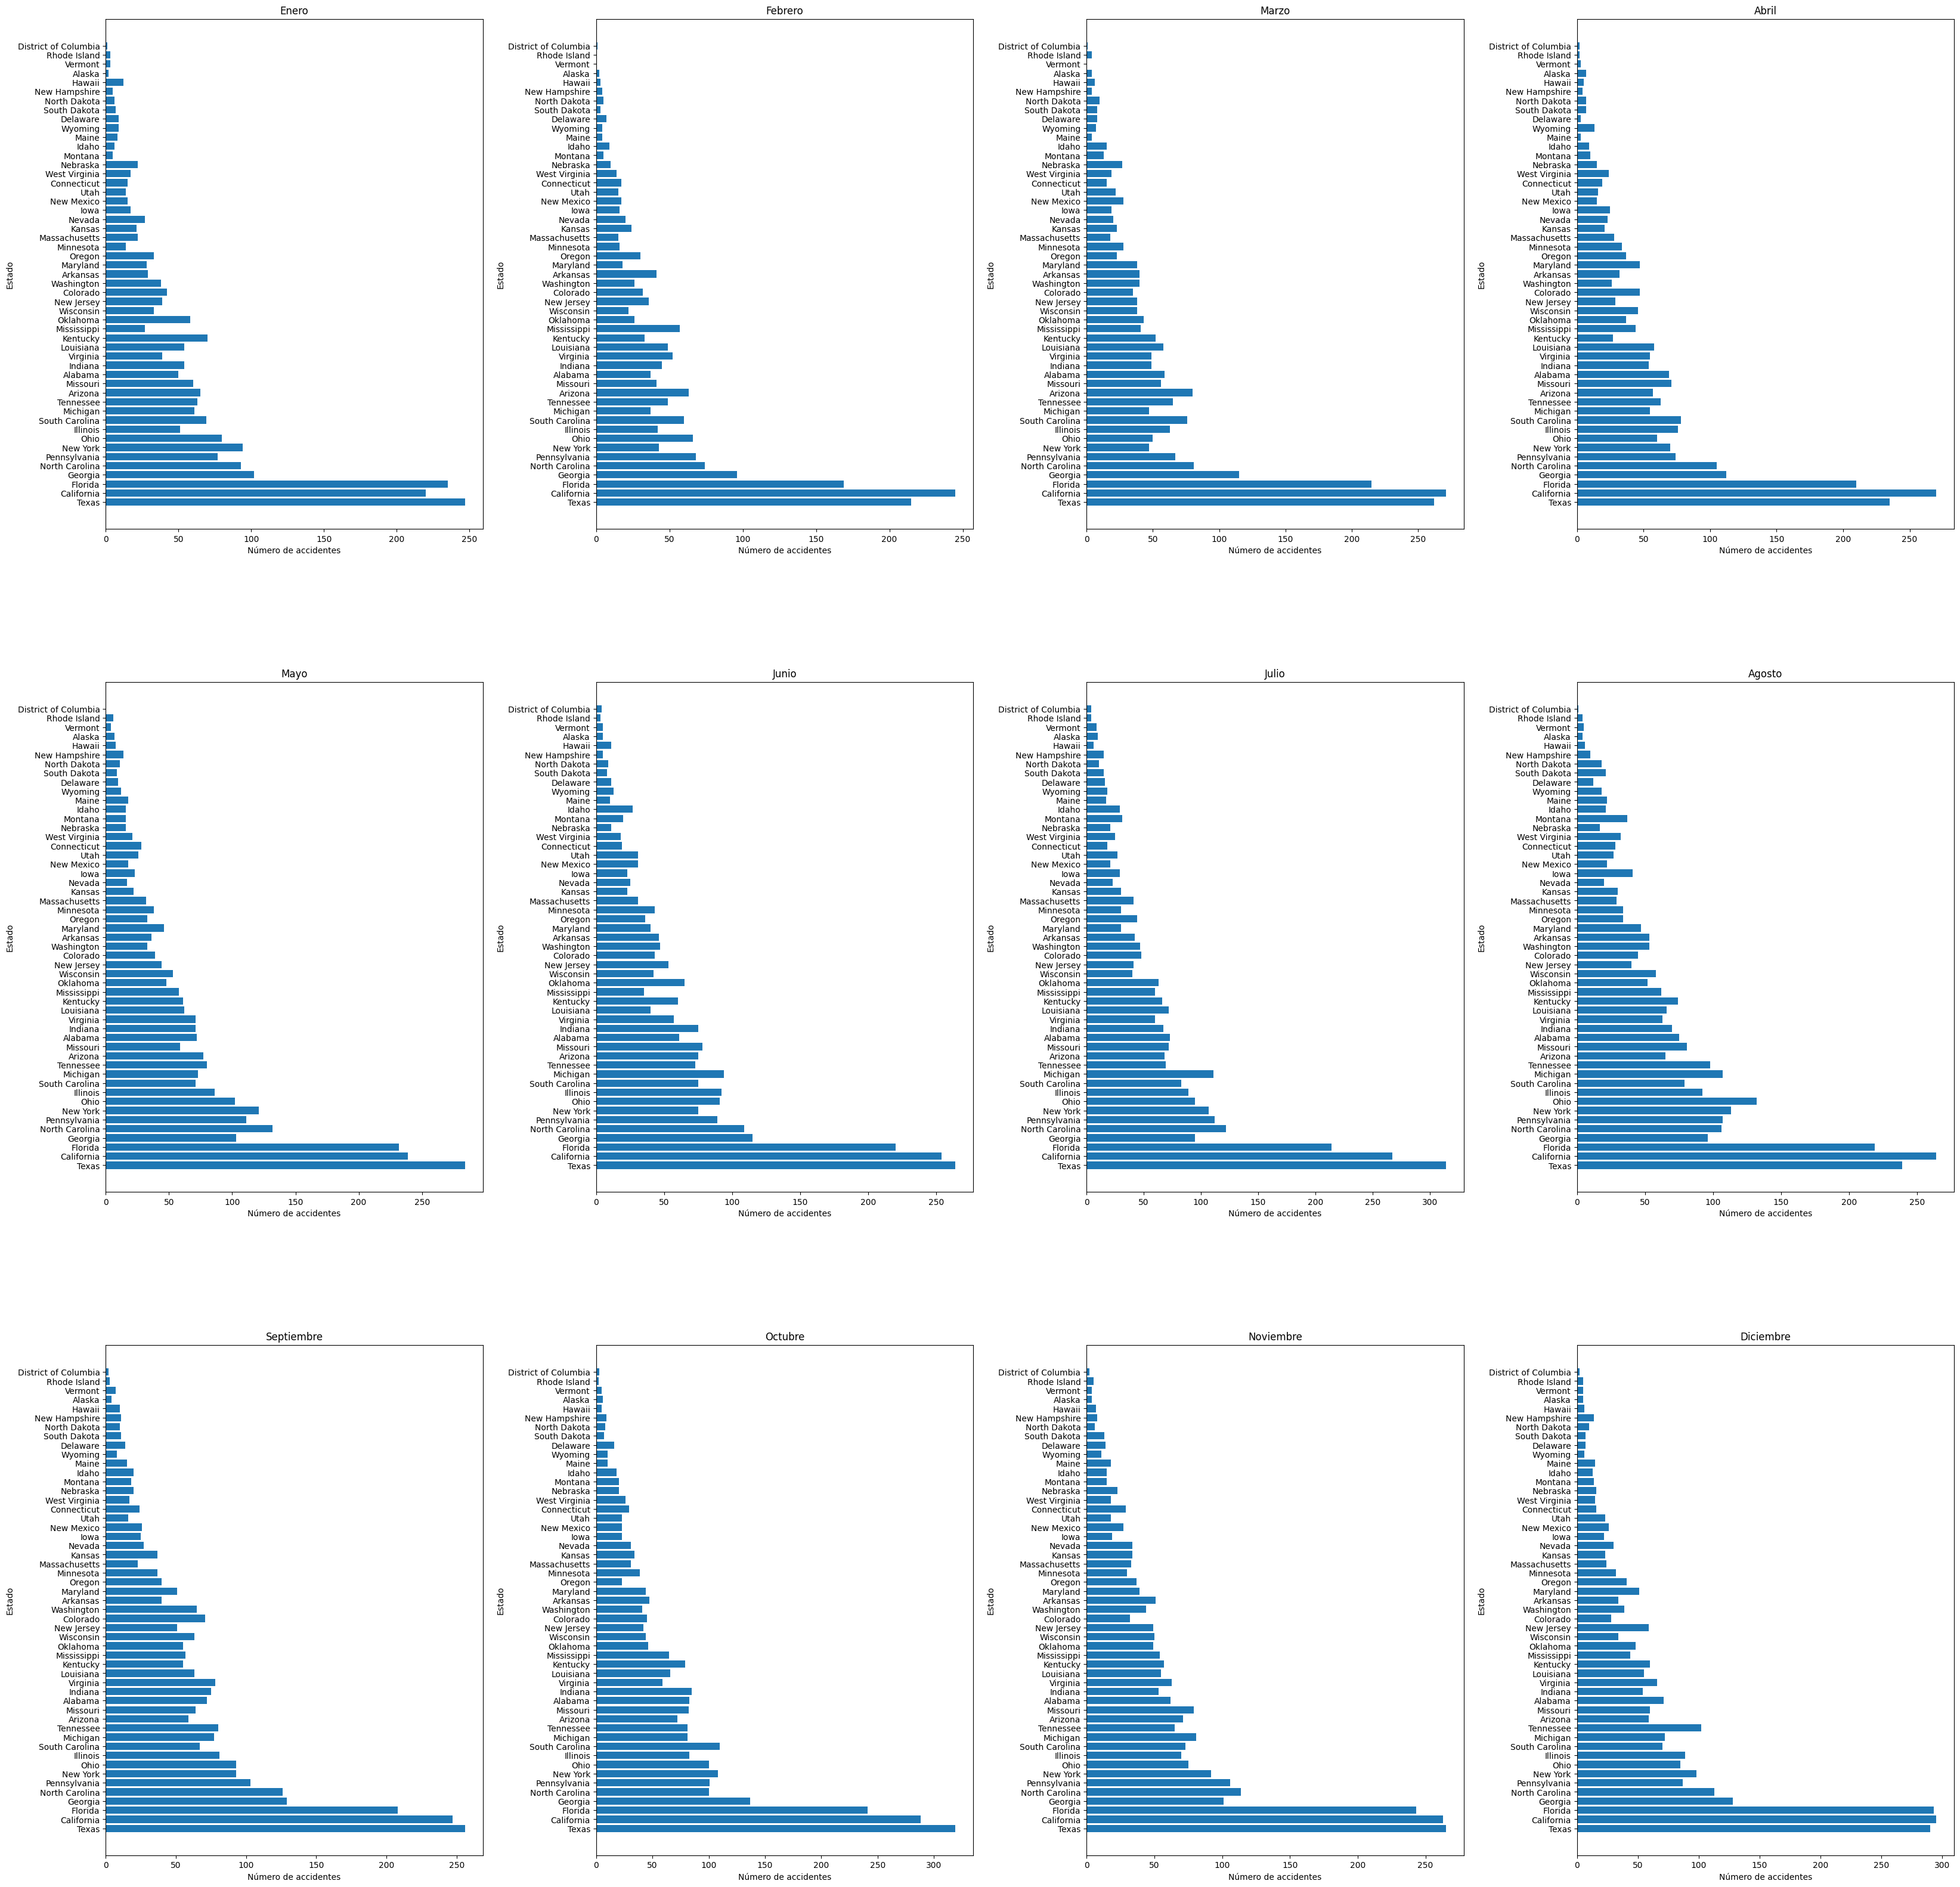

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from google.cloud import bigquery
client = bigquery.Client(project='poto-382221')
query = """
SELECT 
    state_name,
    EXTRACT(MONTH FROM timestamp_of_crash) AS month,
    COUNT(*) AS num_accidents
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
GROUP BY state_name, month
"""

# Ejecutar la consulta
query_job = client.query(query)
results = query_job.result()

# Convertir los resultados a un dataframe de Pandas
results_df = results.to_dataframe()

# Crear un diccionario para mapear los números de mes a los nombres de mes en español
month_names = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
}

# Crear una lista de los estados ordenados por la cantidad de accidentes totales
states_sorted = results_df.groupby('state_name')['num_accidents'].sum().sort_values(ascending=False).index.tolist()

# Crear una figura con 12 subplots, uno para cada mes
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(40, 40))

# Iterar sobre los meses y crear un gráfico de barras para cada mes
for i, month in enumerate(range(1, 13)):
    # Obtener los datos para el mes actual
    month_data = results_df[results_df['month'] == month]
    # Crear un array de ceros para almacenar la cantidad de accidentes para cada estado
    state_counts = np.zeros(len(states_sorted), dtype=int)
    # Iterar sobre los estados y guardar la cantidad de accidentes en el array
    for j, state in enumerate(states_sorted):
        state_counts[j] = month_data[month_data['state_name'] == state]['num_accidents'].sum()
    # Crear un gráfico de barras para el mes actual
    ax = axs[i//4][i%4]
    ax.barh(states_sorted, state_counts)
    ax.set_title(month_names[month])
    ax.set_xlabel('Número de accidentes')
    ax.set_ylabel('Estado')
    
# Ajustar el espaciado entre los subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Mostrar el gráfico
plt.show()